# Paleopandas Playground

The goal of this notebook is to explore the uses of pandas within Pyleoclim, particularly since the implementation of non-nanosecond time resolutions that allow for geological and cosmological time scales to be represented within NumPy/Pandas (references needed)

In [12]:
import pandas as pd; 
print("Pandas " + pd.__version__)
import pyleoclim as pyleo; 
print("Pyleoclim " +  pyleo.__version__)

Pandas 1.5.2
Pyleoclim 0.9.2d


(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot: xlabel='Time [years CE]', ylabel='SOI [mb]'>)

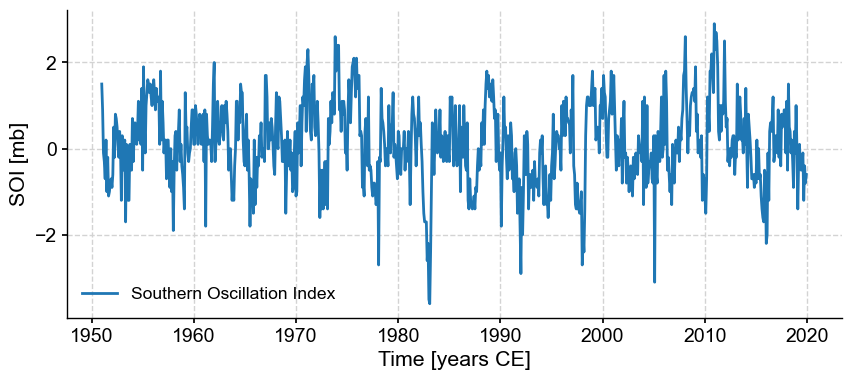

In [9]:
data=pd.read_csv(
    "../example_data/soi_data.csv",
    skiprows=0, header=1
)
time=data.iloc[:,1]
value=data.iloc[:,2]
ts=pyleo.Series(
    time=time, value=value,
    time_name="Time", time_unit='years CE',
    value_name="SOI", value_unit = 'mb',
    label="Southern Oscillation Index",    
)
ts.plot()

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot: xlabel='Time [yrs BP]', ylabel='SOI [mb]'>)

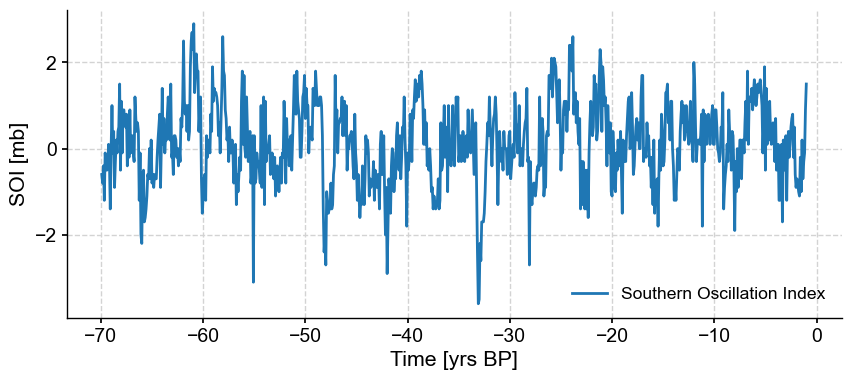

In [6]:
tsBP = ts.convert_time_unit('yrs BP')
tsBP.plot()

In [7]:
tsBP.datetime_index

DatetimeIndex(['2019-12-01 19:30:10', '2019-11-01 08:59:49',
               '2019-10-01 22:30:00', '2019-09-01 12:00:10',
               '2019-08-02 01:29:49', '2019-07-02 15:00:00',
               '2019-06-02 04:30:10', '2019-05-02 17:59:49',
               '2019-04-02 07:30:00', '2019-03-02 21:00:10',
               ...
               '1951-10-01 22:30:00', '1951-09-01 12:00:10',
               '1951-08-02 01:29:49', '1951-07-02 15:00:00',
               '1951-06-02 04:30:10', '1951-05-02 17:59:49',
               '1951-04-02 07:30:00', '1951-03-02 21:00:10',
               '1951-01-31 10:29:49', '1951-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=828, freq=None)

2 questions:
- why is the datetimeindex created with `dtype='datetime64[ns]'`, while L183 of series.py stipulates `np_times = op(op(int(datum), years).astype(str).astype('datetime64[s]'), seconds)`
- why is the datetimeindex not affected by conversion to years BP? It is meant to stay constant despite changes in units? 